# GPAW 

Gpaw lo usaremos a través de Google colab, si bien estamos limitados al entorno gratuito, es la manera más simple de usar el código sin necesidad de contar con instalaciones locales. *Tenga presente que los ejemplos que podremos desarrollar son limitados pero suficientes para aprender a ejecutar el código*

Por lo anterior, cada que iniciemos una nueva instancia en colab sera necesario ejecutar la siguiente celda. Que nos garantiza la instalación de ASE y GPAW. 

Mayores detalles sobre ASE pueden ser encontrados en [ASE](https://wiki.fysik.dtu.dk/ase/)

Toda la documentación de GPAW pueden encontrarla en [GPAW](https://wiki.fysik.dtu.dk/gpaw/)

---

**Nota Aclaratoria: Toda la documentación que se encuentra en esta escuela no pretende remplazar en ningún momento la excelente documentación y tutoriales de los códigos empleados. La escuela y la documentación son  solo una introducción en español para estudiantes que recién comienzan**

---

# Uso  de GPAW  en  colab 

Para  usar  GPAW  en  colab,  siempre  que  iniciemos la  instancia  debemos  ejecutar  obligatoriamente la  siguiente  celda, la  cual  garantiza la  instalación  de los  paquetes.

In [ ]:
%%capture

!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw
!pip install nglview

# Importar paquetes requeridos. 

Dado que haremos una ejecución celda a celda, otra buena idea puede ser importar todos los paquetes que vamos a emplear durante el desarrollo del **cuaderno**, entendiendo que si bien esto sacrifica la portabilidad del código, ayuda a mejorar el entendimiento de los pasos parciales, ya que debemos incluir menos lineas de código. 

Para el ejemplo que ejecutaremos nos bastara con importar los siguientes paquetes 


```python
from ase import Atoms
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import matplotlib.pyplot as plt
```

## Breve descripción de cada paquete 


```python
from ase import Atoms
```

Esta linea importa la clase Atoms, perteneciente al paquete ase. Esta es la clase que nos permite construir manualmente las geometrías de las estructuras que trataremos. 


```python
from ase.visualize.plot import plot_atoms
```

Esta linea importa la función plot_atoms, la cual nos permite visualizar de forma simple la estructura geométrica construida. Tenga en cuenta que esta visualización es muy limitada, pero para una primera referencia es mas que suficiente 

```python
from gpaw import GPAW,PW,FermiDirac
```
Esta linea importa las funciones necesarias para definir el calculador de GPAW. 

Las demás son lineas funcionales de python 


In [ ]:
# Paquetes  para  importar 

from ase import Atoms
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import matplotlib.pyplot as plt

# Construir la Estructura 

---

El primer paso para desarrollar cualquier calculo atómico es tener una primera aproximación de la geometría que deseamos estudiar. 

---

Como ejemplo tomaremos una estructura 2D, en este caso el grafeno. 

Para construir una monocapa de grafeno en ASE debemos tener claro cuales son los vectores de la celda y las posiciones atómicas.

En la siguiente figura , podemos observar la estructura tipo panal de abejas del grafeno. 

---

![](https://www.researchgate.net/profile/Kavitha-M-K/publication/312070999/figure/fig10/AS:668792149508106@1536463882424/a-Honeycomb-lattice-structure-of-graphene-The-unit-cell-consists-of-carbon-atoms.png)

---

Esta estructura seria una red triangular con base. La cual tiene dos átomos no equivalentes, que se etiquetan como átomos A y B.
Si definimos la distancia entre los dos átomos como $a_{cc}$, la cual es aproximadamente 1.44Å. Podemos escribir las coordenadas atómicas en un sistema cartesiano como: 

Atomo | $\hat{i}$ | $\hat{j}$ | $\hat{k}$
------|-----------|-----------|--------
A | 0.0 | 0.0 | 0.0 
B | $a_{cc}$| 0.0 | 0.0 

Y los vectores de la celda unitaria como :|

Vector | $\hat{i}$ | $\hat{j}$ | $\hat{k}$
---------|---------------------|---------------------------|--------
$a_{1}$ | $\frac{3}{2}a_{cc}$| $\frac{\sqrt{3}}{2}acc$ | 0.0| 
$a_{2}$ | $\frac{3}{2}a_{cc}$| -$\frac{\sqrt{3}}{2}acc$ | 0.0 | 
$a_{3}$ | $0.0$ | $0.0$ | 15.0| 

---

Ya con estos datos podemos construir nuestra estructura en ASE, para esto usaremos el objeto Atoms, el cual nos permite construir una estructura de forma manual. La forma básica de Atoms es la siguiente 

```python
st =Atoms(simbolos,posiciones, cell=[],pbc=[])
'''
símbolos : Es una cadena de caracteres con cada uno de los símbolos de los elementos atómicos que constituyen la estructura
posiciones: Una lista que contenga las posiciones cartesianas de cada uno de los átomos 
cell: Una lista con las coordenadas de los tres vectores 
pbc : Una lista de tres valores booleanos que definen a lo largo de cual dirección la celda es periódica.
''' 
```

Luego de construir la estructura ASE cuenta con diferentes modos de visualización. Sin embargo dadas las limitaciones técnicas con las cuales contamos en colab, haremos una previsualización de la estructura empleando matplotlib. el código básico para la visualización es 

```python
fig, ax = plt.subplots()
plot_atoms(st, ax, radii=0.3, rotation=('0x,0y,0z'))

'''
st : Es la estructura creada con Atoms
'''
```

Con esta información ya podemos construir la estructura básica



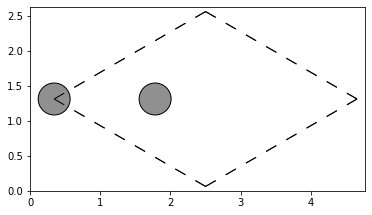

In [ ]:
acc=1.44
st = Atoms('C2',[[0.,0.,7.5],[acc,0.,7.5]], cell=[[1.5*acc,sqrt(3)*acc/2.,0.],[1.5*acc,-sqrt(3)*acc/2.,0.],[0.,0.,15.]],pbc=[True,True,False])
fig, ax = plt.subplots()
plot_atoms(st, ax, radii=0.3, rotation=('0x,0y,0z'))


# Otra  alternativa para  visualizar 

Para visualizar  las  estructuras geometricas  dentro de un cuaderno, podemos  hacerlo  por medio  nglview, adicionalmente  en  colab  debemos  activar algunas otras  opciones tal  como  muestra  el  siguiente ejemplo

In [ ]:
from  ase.visualize import  view 
from google.colab import output
output.enable_custom_widget_manager()

view(st, viewer='ngl')

# Manipulación básica de la celda unitaria 

ASE nos permite manipular algunos aspectos de la geometría que estemos tratando.

Podemos repetirla para generar una celda más grande o podríamos rotar. 

Por ejemplo veamos como podemos construir una supercelda empleando el método repeat()




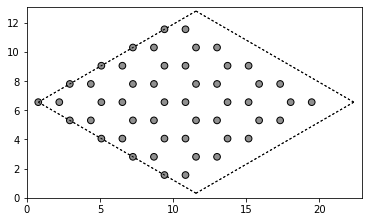

In [ ]:
st_new=st.repeat((5,5,1))
fig, ax = plt.subplots()
plot_atoms(st_new, ax, radii=0.3, rotation=('0x,0y,0z'))

Ahora usemos el método rotate(), para rotar la celda unitaria a lo largo del eje "z" 90°


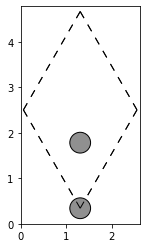

In [ ]:
st.rotate(90,'z',rotate_cell=True)
fig, ax = plt.subplots()
plot_atoms(st, ax, radii=0.3, rotation=('0x,0y,0z'))

Tenga  presente  que al  ejecutar cada  acción en el  cuaderno se  modifica todo para las  celdas  subsiguientes 

# Calculo de la energía total con GPAW

Dada una estructura geométrica, el siguiente paso es determinar la energía total. Ahora debemos definir como calcular la energía total del sistema. Para esto usaremos GPAW. 

GPAW permite usar tres modos de calculo ⁉

* PW : Ondas planas 
* fd : Diferencias finitas 
* lcao : Combinación lineal de orbitales atómicos 

A lo largo de este tutorial emplearemos el modo de ondas planas PW. para esto debemos importar los paquetes necesarios de GPAW 


```python
from gpaw import GPAW,PW,FermiDirac

'''
GPAW : Es el calculador donde definimos todos los parametros
PW: Modo de ondas planas
FermiDirac : Define la función de ocupación 
'''
```

los parámetros básicos para un calculo en GPAW, son los siguiente:


```python
calc = GPAW(mode='modo',
xc='Funcional',
occupations=FermiDirac(width=0.01),
kpts={'size': (2, 2, 1), 'gamma': True},
txt='salida.log')
```

Con esto podemos ya calcular la energía total del sistema 






In [ ]:
calc = GPAW(mode=PW(100),
            xc='LDA',
            occupations=FermiDirac(width=0.01),
            kpts={'size': (2, 2, 1), 'gamma': True},
            txt='graphene.log')
st.calc =calc
Etotal = st.get_potential_energy()
print("La  energia total  es  {} eV".format(Etotal))

La  energia total  es  3.0114874670393514 eV


## **Ejercicio:**

Una bicapa de grafeno esta compuesta por dos monocapas, separadas a lo largo del eje z al rededor de $3.3$Å. Los átomos pueden estar alineados unos con otros formando la configuración denominada AA. Construya una bicapa de grafeno AA y calcule su energía total. Compare esta energía con la obtenida para la monocapa.